In [25]:
import pandas as pd
import numpy as np
%matplotlib inline

In [26]:
# df = pd.read_csv("airline-passengers.csv", index_col=0, parse_dates=True)
df = pd.read_csv("airline-passengers.csv", index_col="Month")
df.head(2)

,Passengers
Month,
1949-01,112
1949-02,118


In [27]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [28]:
df = df.dropna()

In [29]:
df.index=pd.to_datetime(df.index)
df.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


In [30]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [31]:
df["6-month-avg"] = df['Passengers'].rolling(window=6).mean()

In [32]:
df["12-month-avg"] = df['Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

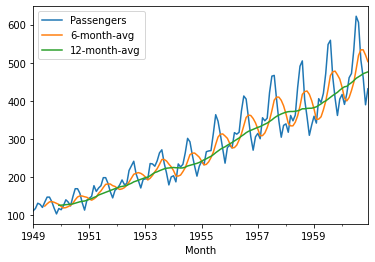

In [33]:
df.plot()

In [34]:
df['EWMA-12'] = df['Passengers'].ewm(span=12).mean()
df['EWMA-12']

Month
1949-01-01    112.000000
1949-02-01    115.250000
1949-03-01    121.787529
1949-04-01    124.064224
1949-05-01    123.231685
                 ...    
1960-08-01    494.898620
1960-09-01    496.914217
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01    469.053629
Name: EWMA-12, Length: 144, dtype: float64

<Axes: xlabel='Month'>

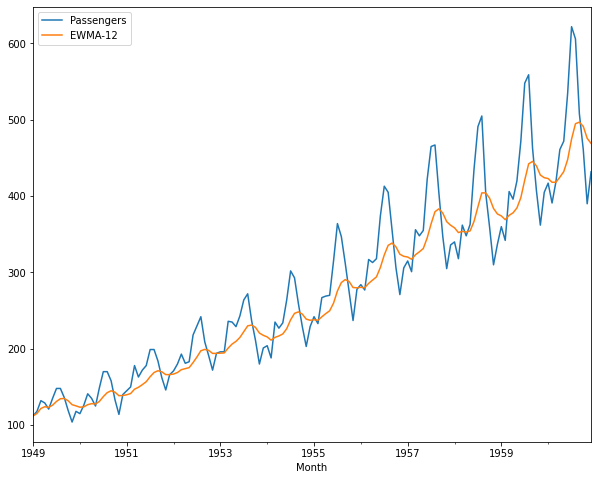

In [35]:
df[['Passengers','EWMA-12']].plot(figsize=(10,8))